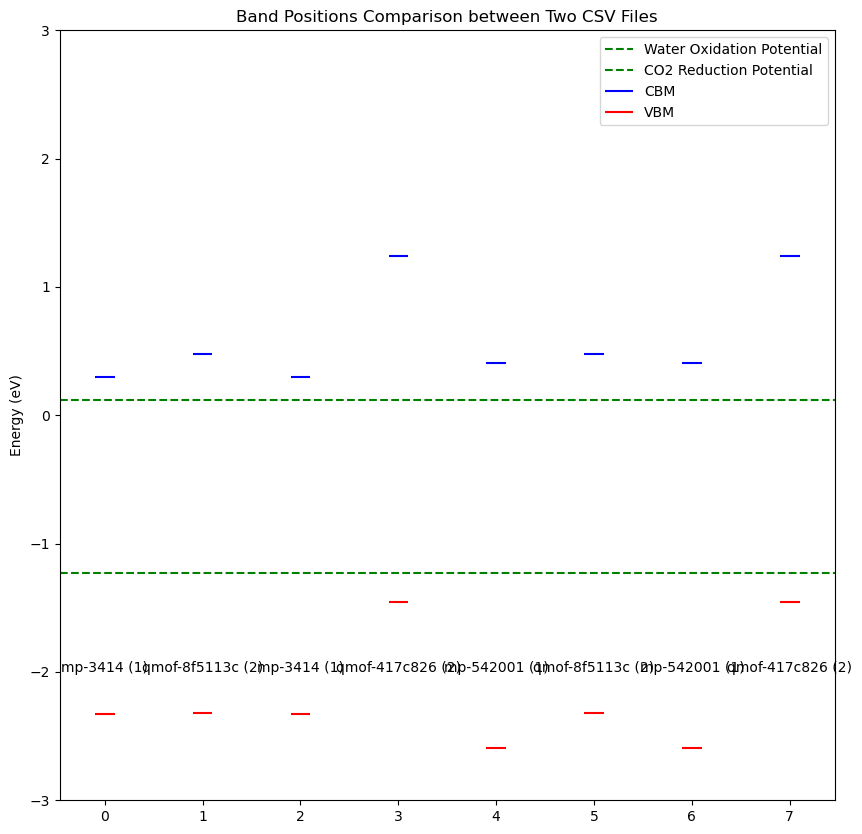

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product


df1 = pd.read_csv('/Users/moinkhwaja/Documents/GitHub/Heterojunction-Metal-Organic-Framework-Photocataysts/MO_MOF_Matching_Method/Diagram/core.csv').head(2)  # Update path as necessary
df2 = pd.read_csv('/Users/moinkhwaja/Documents/GitHub/Heterojunction-Metal-Organic-Framework-Photocataysts/MO_MOF_Matching_Method/Diagram/mof.csv').head(2)  # Update path as necessary


combinations = list(product(df1.iterrows(), df2.iterrows()))


plt.figure(figsize=(10, 10))  
water_oxidation = -1.23
co_reduction = 0.12
plt.axhline(y=water_oxidation, color='green', linestyle='--', label='Water Oxidation Potential')
plt.axhline(y=co_reduction, color='green', linestyle='--', label='CO2 Reduction Potential')


for idx, ((idx1, row1), (idx2, row2)) in enumerate(combinations):
   
    material1 = row1['Material ID']
    cbm1 = row1['CBM']
    vbm1 = row1['VBM']
    material2 = row2['qmof_id']
    cbm2 = row2['outputs.pbe.cbm']
    vbm2 = row2['outputs.pbe.vbm']
    
    position = 2 * idx  
    plt.hlines(cbm1, position - 0.1, position + 0.1, colors='blue', label='CBM' if idx == 0 else "")
    plt.hlines(vbm1, position - 0.1, position + 0.1, colors='red', label='VBM' if idx == 0 else "")
    plt.hlines(cbm2, position + 0.9, position + 1.1, colors='blue')
    plt.hlines(vbm2, position + 0.9, position + 1.1, colors='red')
    

    plt.text(position, -2, f'{material1} (1)', horizontalalignment='center')
    plt.text(position + 1, -2, f'{material2} (2)', horizontalalignment='center')


plt.ylabel('Energy (eV)')
plt.title('Band Positions Comparison between Two CSV Files')
plt.legend()
plt.ylim(-3, 3)  
plt.show()
